In [34]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Open our raster dataset
dataset = rasterio.open('data/LE70220491999322EDC01_stack.gtif')
image = dataset.read()

In [4]:
# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj)

Number of bands in image: 8

Image size is: 250 rows x 250 columns

Raster driver: GTiff

Image projection:
EPSG:32615


In [5]:
red_band = image[2, :, :] # this pulls out the 3rd band
print(red_band.shape)


(250, 250)


In [6]:
red_band_read = dataset.read(3) # this pulls out the 3rd band
print(red_band_read.shape)

if np.array_equal(red_band_read, red_band): # are they equal?
    print('They are the same.')

(250, 250)
They are the same.


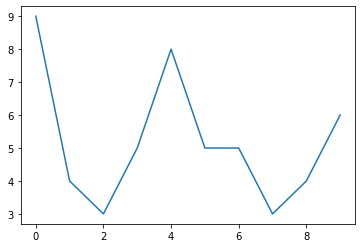

In [8]:
# Array of 0 - 9
x = np.arange(10)
# 10 random numbers, between 0 and 10
y = np.random.randint(0, 10, size=10)

# plot them as lines
plt.plot(x, y)

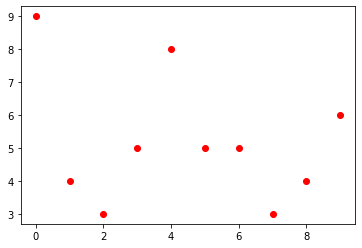

In [9]:
# plot them as just points -- specify "ls" ("linestyle") as a null string
plt.plot(x, y, 'ro', ls='')

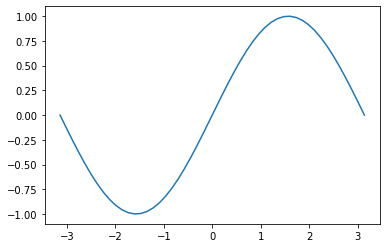

In [10]:
# prepare 50 x-coordinates and 50 y-coordinates
x = np.linspace(-np.pi, np.pi, 50)
y = np.sin(x)

# Plot using matplotlib's functional API:
# a single function call produces a plot; convenient but less flexible
plt.plot(x, y)

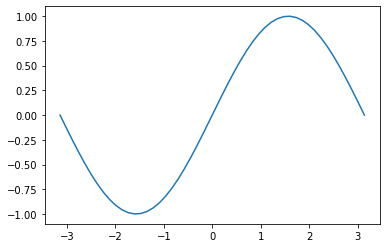

In [11]:
# Plot using matplotlib's object-oriented API:
# we generate a figure and axis object: `fig` and `ax`
fig, ax = plt.subplots()
# we then use these objects to draw-on and manipulate our plot
ax.plot(x, y)

In [12]:
red = image[3, :, :]
nir = image[4, :, :]

print('Array shape before: {shp} (size is {sz})'.format(shp=red.shape, sz=red.size))

red_flat = np.ndarray.flatten(red)
nir_flat = np.ndarray.flatten(nir)

print('Array shape after: {shp} (size is {sz})'.format(shp=red_flat.shape, sz=red_flat.size))

Array shape before: (250, 250) (size is 62500)
Array shape after: (62500,) (size is 62500)


Text(0.5, 1.0, 'Tasseled Cap, eh?')

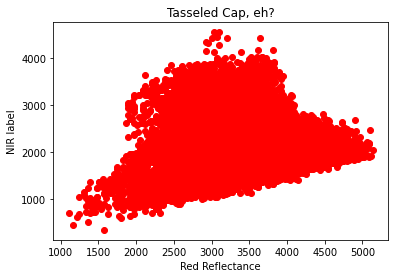

In [13]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(red_flat, nir_flat, color='r', marker='o')

# Add some axis labels
ax.set_xlabel('Red Reflectance')
ax.set_ylabel('NIR label')

# Add a title
ax.set_title('Tasseled Cap, eh?')

Text(0.5, 1.0, 'Tasseled Cap, eh?')

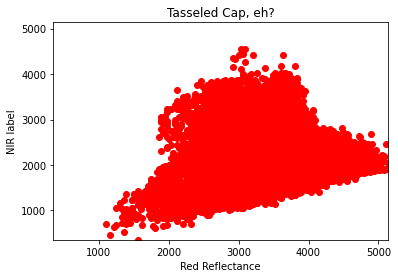

In [14]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(red_flat, nir_flat, color='r', marker='o')

# Calculate min and max
plot_min = min(red.min(), nir.min())
plot_max = max(red.max(), nir.max())

ax.set_xlim((plot_min, plot_max))
ax.set_ylim((plot_min, plot_max))

# Add some axis labels
ax.set_xlabel('Red Reflectance')
ax.set_ylabel('NIR label')

# Add a title
ax.set_title('Tasseled Cap, eh?')

Text(0.5, 1.0, 'Band Intensities')

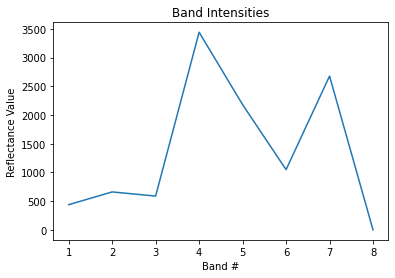

In [15]:
# numbers 1-8
x = np.arange(1,9)
# lets get the average value of each band
y = np.mean(image, axis=(1,2))

fig, ax = plt.subplots()
# plot them as lines
ax.plot(x, y)

# Add some axis labels
ax.set_xlabel('Band #')
ax.set_ylabel('Reflectance Value')
# Add a title
ax.set_title('Band Intensities')

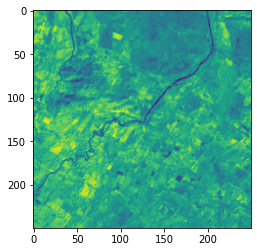

In [16]:
# use the matplotlib.pyplot function "imshow" for an image -- nir at first
fig, ax = plt.subplots()
ax.imshow(image[3, :, :])

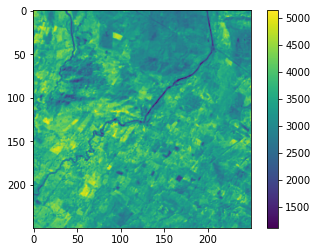

In [17]:
# use "imshow" for an image -- nir at first
fig, ax = plt.subplots()
img = ax.imshow(image[3, :, :])
fig.colorbar(img, ax=ax) # we have to pass the current plot as an argument thus have to set it as a variable

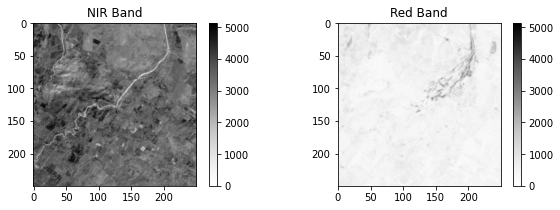

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3)) # 2 axes on a 1x2 grid
# note that we could also use indexing for our axes:
# fig, ax = plt.subplots(1, 2)
# ax1 = ax[0]

# find max reflectance to put them on the same colorbar scale
max_ref = np.amax([np.amax(image[3:,:]), np.amax(image[2:,:])])

# nir in first subplot
nir = ax1.imshow(image[3, :, :], cmap=plt.cm.Greys)
ax1.set_title("NIR Band")
nir.set_clim(vmin=0, vmax=max_ref)

fig.colorbar(nir, ax=ax1)

# Now red band in the second subplot
red = ax2.imshow(image[2, :, :], cmap=plt.cm.Greys)
ax2.set_title("Red Band")
red.set_clim(vmin=0, vmax=max_ref)
fig.colorbar(red, ax=ax2)

In [19]:
from rasterio.plot import reshape_as_raster, reshape_as_image

# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
colors = image[index, :, :].astype(np.float64)

max_val = 5000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[0]):
    colors[b, :, :] = colors[b, :, :] * 1 / (max_val - min_val)

# rasters are in the format [bands, rows, cols] whereas images are typically [rows, cols, bands]
# and so our array needs to be reshaped
print(colors.shape)
colors_reshaped = reshape_as_image(colors)
print(colors_reshaped.shape)

(3, 250, 250)
(250, 250, 3)


In [20]:
np.seterr(divide='ignore', invalid='ignore')
bandNIR = image[3, :, :]
bandRed = image[2, :, :]

ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

Text(0.5, 1.0, 'NDVI')

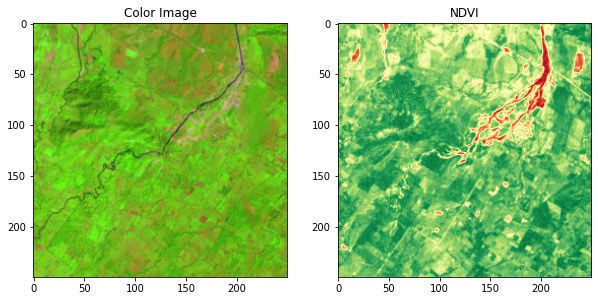

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10)) 

# Show the color image
axs[0].imshow(colors_reshaped)
axs[0].set_title('Color Image')

# Show NDVI
axs[1].imshow(ndvi, cmap='RdYlGn')
axs[1].set_title('NDVI')

<AxesSubplot:>

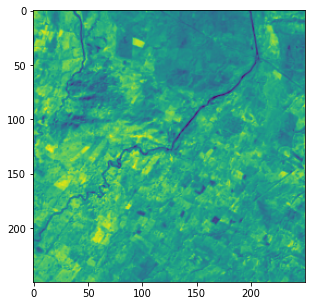

In [26]:
# this functions build on matplotlib and make them custom for rasterio
from rasterio.plot import show
fig, ax = plt.subplots(figsize=(10,5))

# display just band 4 (NIR)
show((dataset.read(4)), ax=ax)

Text(0.5, 1.0, 'RGB in matplotlib imshow')

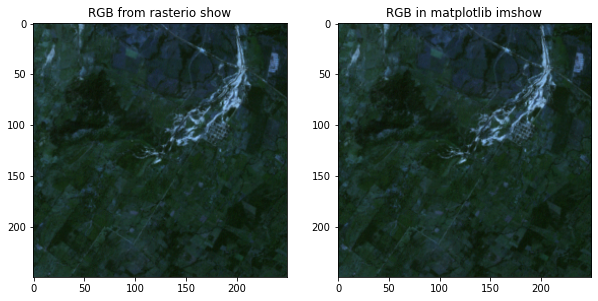

In [27]:
from rasterio.plot import adjust_band

rgb = image[0:3] # read in red, green, blue
rgb_norm = adjust_band(rgb) # normalize bands to range between 1.0 to 0.0
rgb_reshaped = reshape_as_image(rgb_norm) # reshape to [rows, cols, bands]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# the rasterio show function takes in [bands, rows, cols] so we don't need to reshape
show(rgb_norm, ax=axs[0])
axs[0].set_title("RGB from rasterio show")

# plot with normal matplotlib functions
axs[1].imshow(rgb_reshaped)
axs[1].set_title("RGB in matplotlib imshow")

<AxesSubplot:title={'center':'blue channel'}>

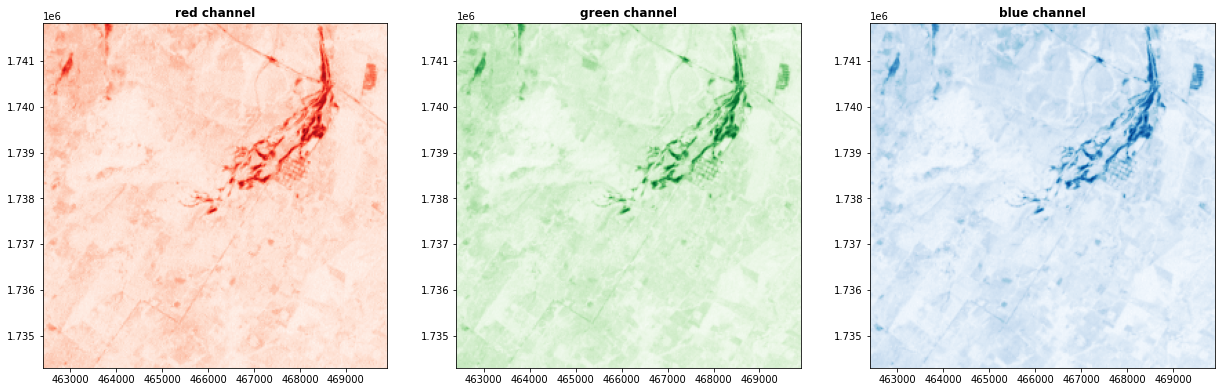

In [28]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
show((dataset, 1), ax=axr, cmap='Reds', title='red channel')
show((dataset, 2), ax=axg, cmap='Greens', title='green channel')
show((dataset, 3), ax=axb, cmap='Blues', title='blue channel')

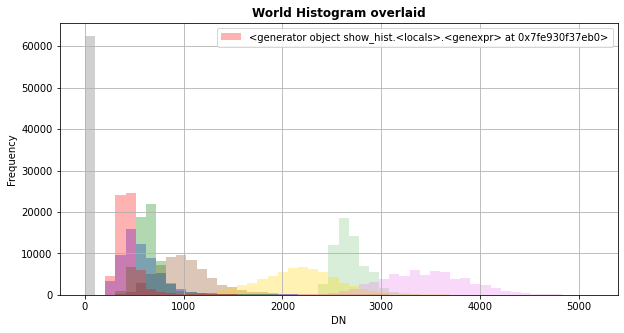

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
show_hist(dataset, ax=ax, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")